# Proyek Pertama - Predictive Analytics
- **Nama:** Yuda Reyvandra Herman
- **Email:** reyvandrayuda@gmail.com
- **ID Dicoding:** [MC189D5Y0450]


Stroke Prediction Dataset
#### Sumber Data : [kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.metrics import roc_curve, auc
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

 **Insight**
 - pada bagian ini saya meng-import semua library yang dibutuhkan untuk project ini

# Data Understanding

### Data Preparetion

In [2]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
print("Data Loaded Successfully ✅\n")


Data Loaded Successfully ✅



- pada tahap ini dataset akan disimpan dalam variabel 'df'

In [3]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


- id: Ini unique identifier buat tiap orang, kayak nomor kartu identitas tapi buat dataset. Jadi setiap row punya nomor unik biar gampang tracking.

- gender: Jenis kelamin orangnya, biasanya dikasih angka 0 atau 1 buat cowok atau cewek

- age: Umur si pasien, buat ngecek risiko kesehatan yang biasanya makin tua makin tinggi.

- hypertension: Ini tekanan darah tinggi, 0 (enggak punya) atau 1 (punya). Hypertension bisa jadi faktor risiko stroke.

- heart_disease: Apakah dia punya riwayat penyakit jantung, juga 0 berarti nggak punya atau 1 berarti punya

- ever_married: Pernah menikah atau enggak.

- work_type: Jenis pekerjaan, kayak apakah dia kerja kantoran, wiraswasta, atau nggak kerja. Kadang ini ngaruh ke gaya hidup dan stres.

- Residence_type: Tempat tinggal, biasanya dibagi urban (kota) atau rural (desa), yang bisa berpengaruh ke akses kesehatan dan pola hidup.

- vg_glucose_level: Rata-rata kadar gula darah, angka penting buat ngecek risiko diabetes yang juga ngaruh stroke.

- bmi: Body Mass Index, ini buat ngecek berat badan ideal atau enggak.

- smoking_status: Status merokok, kayak perokok aktif, mantan perokok, atau nggak pernah merokok. Merokok jelas faktor risiko stroke juga.

- stroke: Target variabelnya, apakah orang ini pernah mengalami stroke (0 untuk enggak, 1 untuk iya).

### Data Cleaning

In [4]:
# Cek struktur awal
print("📊 Info Awal Dataset:")
df.info()

# Cek missing values
print("\n🔎 Missing Values Sebelum Dibersihin:")
print(df.isnull().sum())

📊 Info Awal Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

🔎 Missing Values Sebelum Dibersihin:
id                     0
gender                 0
age                    0
hypertension           

**Insight**
- Terdapat 5110 Entries di setiap kolomnya, kecuali kolom BMI
- Terdapat 5 kolom dengan tipe data "object" seperti gender, ever_married,work_type, residence_type, dan smoking_status
-Terdapat 4 kolom dengan tipe data "int64" seperti id, hypertension, heart_disease, stroke
- Terdapat 3 kolom dengan tipe data "float64" seperti age, avg_glucose_level, bmi
- Pada kolom BMI terdapat 201 missing value

In [5]:
# Isi missing value kolom 'bmi' dengan median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

- Kode ini berfungsi untuk mengisi missing value di kolom ‘bmi’ pake median supaya data lebih lengkap.

In [6]:
# Cek ulang missing value
print("\n✅ Missing Values Setelah Dibersihin:")
print(df.isnull().sum())


✅ Missing Values Setelah Dibersihin:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


- Missing value pada kolom 'bmi' udah berhasil ditangani, sehingga tidak ada lagi missing value pada kolom 'bmi' dan kolom lainnya

In [7]:
# Nilai unik tiap kolom
print("\n🔍 Jumlah Nilai Unik per Kolom:")
print(df.nunique())


🔍 Jumlah Nilai Unik per Kolom:
id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


- id (5110 unik): Semua baris unik.

- gender (3 unik): Ada 3 kategori gender, cowok, cewek, dan “Other”.

- age (104 unik): Variasi umur lumayan banyak, dari anak kecil sampai mungkin lansia.

- hypertension (2 unik): Cuma ada dua opsi, ya atau tidak

- heart_disease (2 unik): Sama kayak hypertension, cuma 0 dan 1, ya atau nggak

- ever_married (2 unik): Pernah menikah atau enggak, ya atau tidak

- work_type (5 unik): Ada 5 jenis pekerjaan.

- Residence_type (2 unik): Cuma ada dua, urban dan rural.

- avg_glucose_level (3979 unik): Variasi gula darah super tinggi, ini data numerik terus menerus.

- bmi (418 unik): Variasi BMI juga lumayan, cukup untuk ngasih gambaran lengkap soal berat badan.

- smoking_status (4 unik): Ada 4 kategori, mungkin perokok, mantan perokok, bukan perokok, dan unknown. buat analisis risiko.

- stroke (2 unik): Target biner, pernah stroke atau enggak, jelas buat klasifikasi.


🚻 Distribusi Kolom Gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


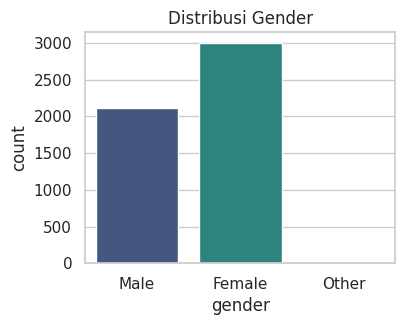

In [8]:
print("\n🚻 Distribusi Kolom Gender:")
print(df['gender'].value_counts())

plt.figure(figsize=(4, 3))
sns.countplot(x='gender', data=df, palette='viridis')
plt.title('Distribusi Gender')
plt.show()

- Mayoritas data diisi oleh perempuan (2994), disusul laki-laki (2115), dan cuma 1 orang yang masuk kategori "Other"


🚻 Distribusi Kolom Gender Setelah Menghapus 'Other':
gender
Female    2994
Male      2115
Name: count, dtype: int64


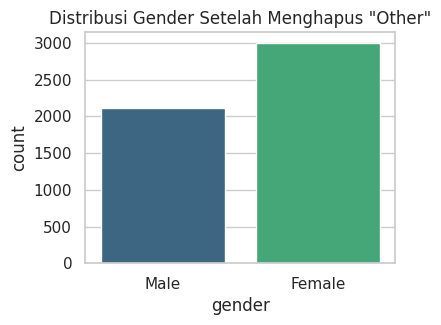

In [9]:
df = df[df['gender'] != 'Other']

print("\n🚻 Distribusi Kolom Gender Setelah Menghapus 'Other':")
print(df['gender'].value_counts())

plt.figure(figsize=(4, 3))
sns.countplot(x='gender', data=df, palette='viridis')
plt.title('Distribusi Gender Setelah Menghapus "Other"')
plt.show()

- Kategori 'other' pada kolom gender telah dihapus, karena memang sejatinya hanya ada 2 gender saja di dunia ini, yaitu perempuan dan laki-laki

In [10]:
print("\n🔄 Jumlah Data Duplikat:")
print(df.duplicated().sum())

# Cek data duplikat
duplicate_rows_df = df[df.duplicated()]
print("\n🚨 Baris Data Duplikat:")
duplicate_rows_df


🔄 Jumlah Data Duplikat:
0

🚨 Baris Data Duplikat:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


- Setelah di cek, tidak ada data yang duplikat dalam dataset ini

# Exploratory Data Analysis (EDA)

### EDA

📦 Dataset Shape: (5109, 12)

📊 Statistik Deskriptif Numerik:
                  id          age  hypertension  heart_disease  \
count   5109.000000  5109.000000   5109.000000    5109.000000   
mean   36513.985516    43.229986      0.097475       0.054022   
std    21162.008804    22.613575      0.296633       0.226084   
min       67.000000     0.080000      0.000000       0.000000   
25%    17740.000000    25.000000      0.000000       0.000000   
50%    36922.000000    45.000000      0.000000       0.000000   
75%    54643.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5109.000000  5109.000000  5109.000000  
mean          106.140399    28.863300     0.048738  
std            45.285004     7.699785     0.215340  
min            55.120000    10.300000     0.000000  
25%            77.240000    23.800000     0.000000  
50%            91.880000    28.100

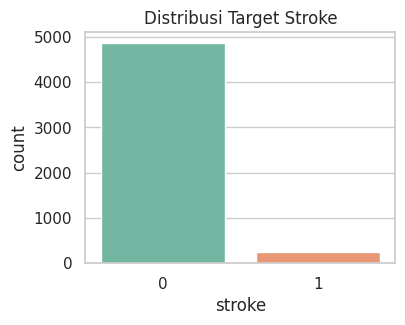

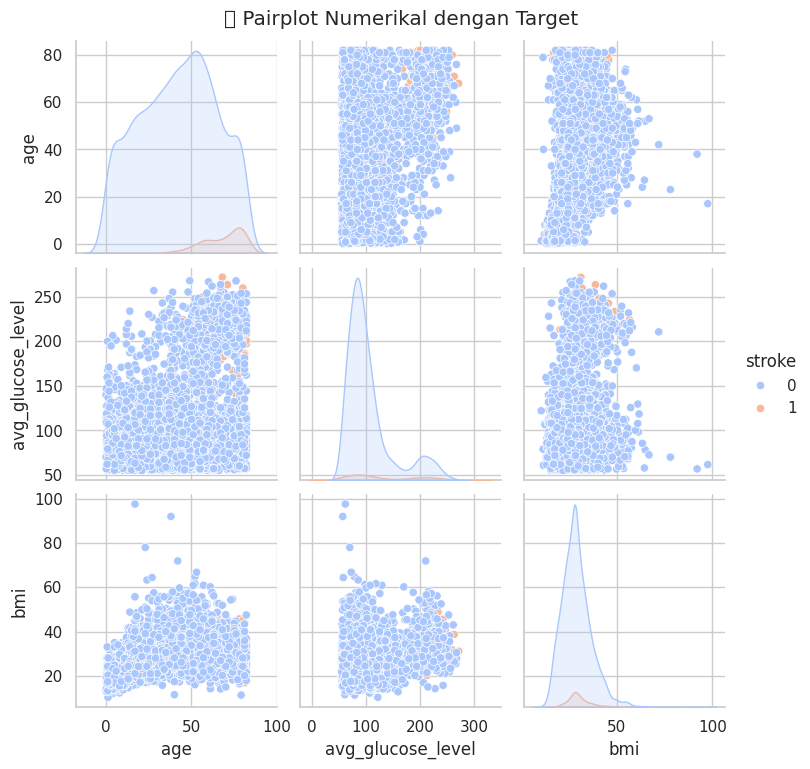

In [11]:
# Shape
print("📦 Dataset Shape:", df.shape)

# Statistik numerik
print("\n📊 Statistik Deskriptif Numerik:\n", df.describe())

# Distribusi Target (Class Imbalance Check)
stroke_counts = df['stroke'].value_counts(normalize=True) * 100
print("\n⚠️ Distribusi Target Stroke (%):")
print(stroke_counts)

plt.figure(figsize=(4, 3))
sns.countplot(x='stroke', data=df, palette='Set2')
plt.title('Distribusi Target Stroke')
plt.show()

# Pairplot antar fitur numerik + stroke
sns.pairplot(df[['age', 'avg_glucose_level', 'bmi', 'stroke']], hue='stroke', palette='coolwarm')
plt.suptitle("📈 Pairplot Numerikal dengan Target", y=1.02)
plt.show()


- Jumlah Data: Dataset punya 5109 baris & 12 kolom.

- Target Stroke Imbalanced,
Cuma 4.87% data yang kena stroke, sisanya 95.13% nggak.

- Kolom Numerik Udah Distandarisasi
Nilai mean ≈ 0 dan std ≈ 1 buat kolom numerik kayak age, bmi, avg_glucose_level, dll.

- Kolom Kategorikal Udah Di-Encode ke Angka
Kayak gender, ever_married, work_type, smoking_status dll udah berubah dari string ke angka.

### EDA Univariate

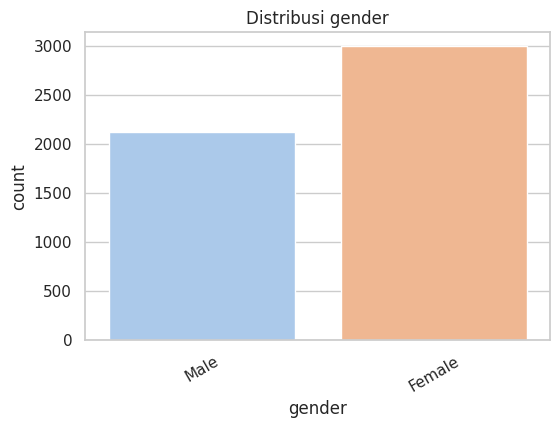

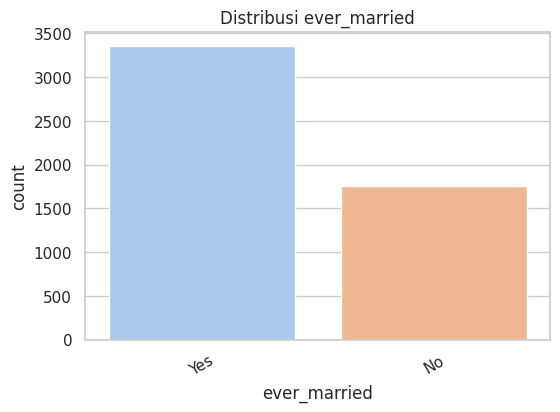

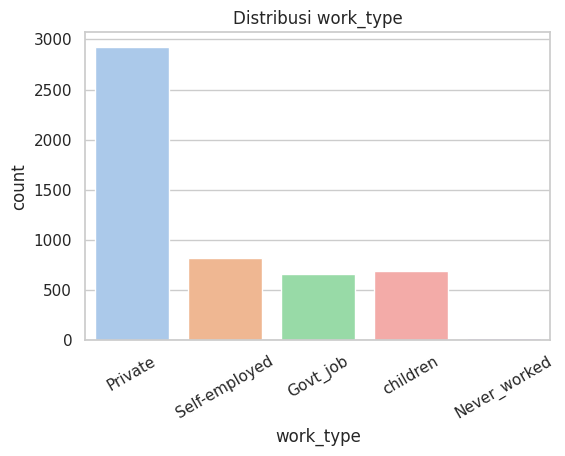

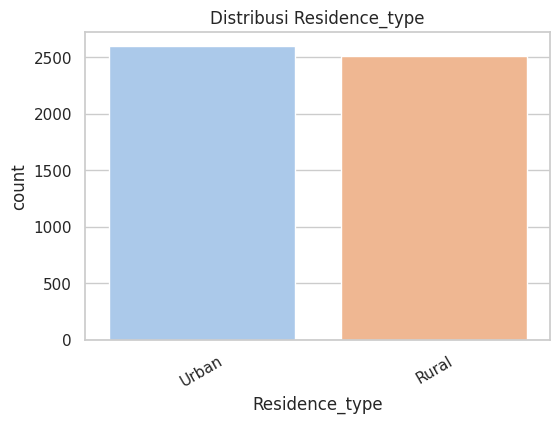

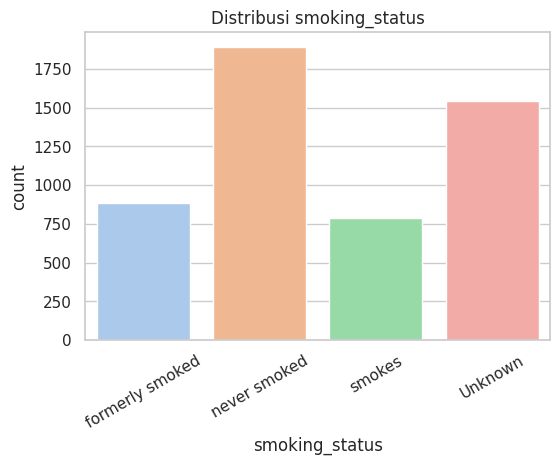

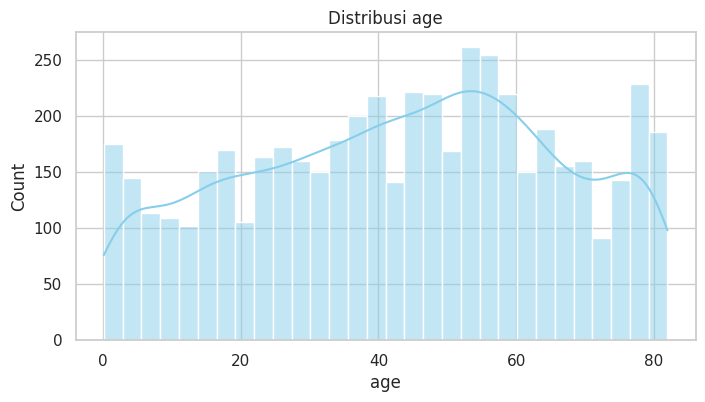

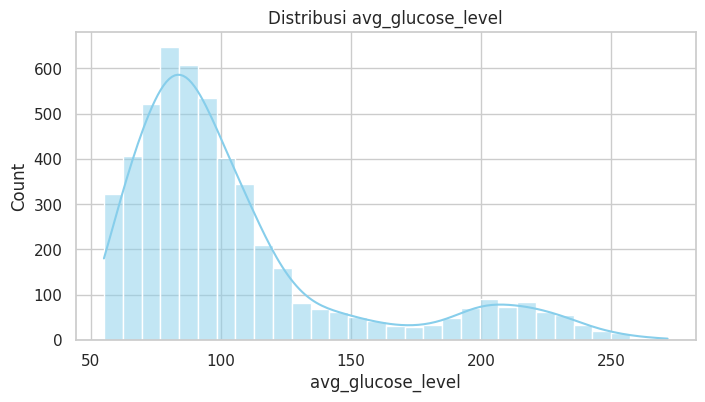

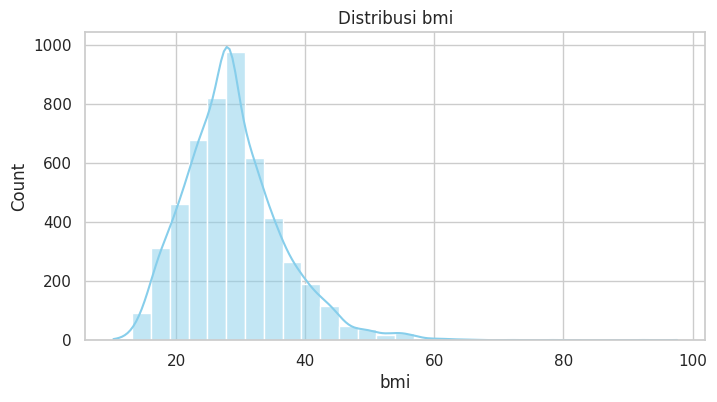

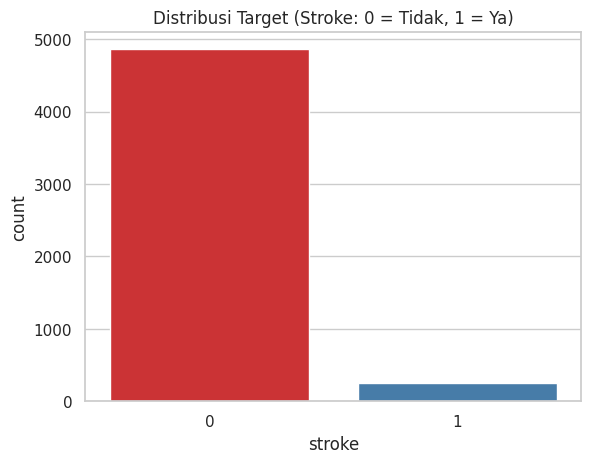

In [12]:
# --- Categorical Variables ---
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=30)
    plt.show()

# --- Numerical Variables ---
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.show()

sns.countplot(x='stroke', data=df, palette='Set1')
plt.title('Distribusi Target (Stroke: 0 = Tidak, 1 = Ya)')
plt.show()

**Insight**
- Distribusi Gender = Perempuan lebih banyak dari laki-laki dalam dataset ini.
- Distribusi Ever Married = Mayoritas responden sudah pernah menikah.
- Distribusi Work Type = Pekerja swasta (Private) mendominasi, disusul self-employed dan sektor pemerintah.
- Distribusi Residence Type = Urban vs Rural hampir imbang, tapi sedikit lebih banyak yang tinggal di wilayah urban.
- Distribusi Smoking Status = Mayoritas orang nggak pernah merokok, tapi kategori “Unknown” juga tinggi banget.
- Distribusi Usia (age) = Populasi tersebar merata di hampir semua rentang usia, tapi terlihat peningkatan signifikan mulai usia 40-an hingga 60-an, yang menunjukkan mayoritas data berasal dari usia dewasa hingga lansia.
- Distribusi Rata-rata Glukosa (avg_glucose_level) = Mayoritas individu memiliki kadar glukosa antara 80–110, tapi ada ekor panjang di sisi kanan grafik, yang nunjukin ada sejumlah orang dengan kadar glukosa tinggi banget
- Distribusi BMI = cenderung normal dengan sebagian besar individu berada di rentang BMI 20-40, menunjukkan adanya kecenderungan obesitas ringan hingga sedang yang ada dalam dataset
- Data set sangat tidak seimbang (imbalanced), dengan jumlah kasus "Tidak Stroke" (0) jauh lebih banyak dibandingkan kasus "Stroke" (1)

### EDA Multivariate

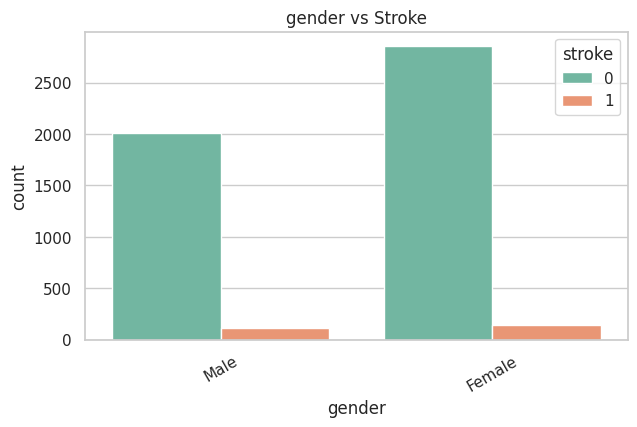

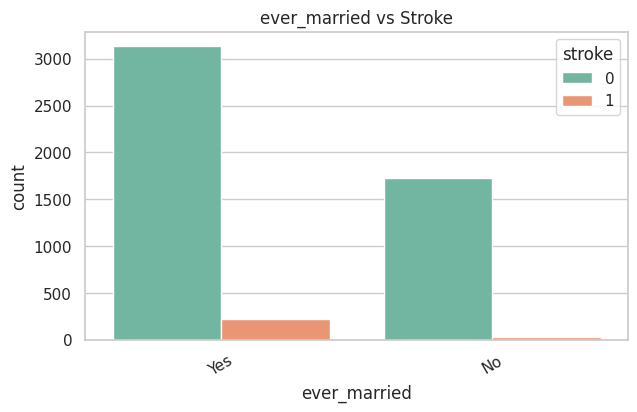

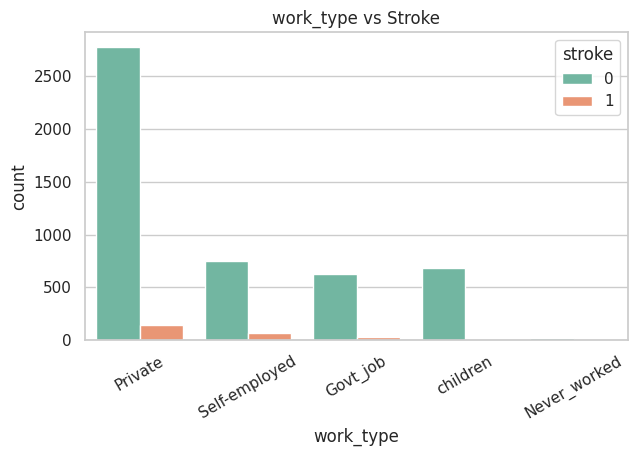

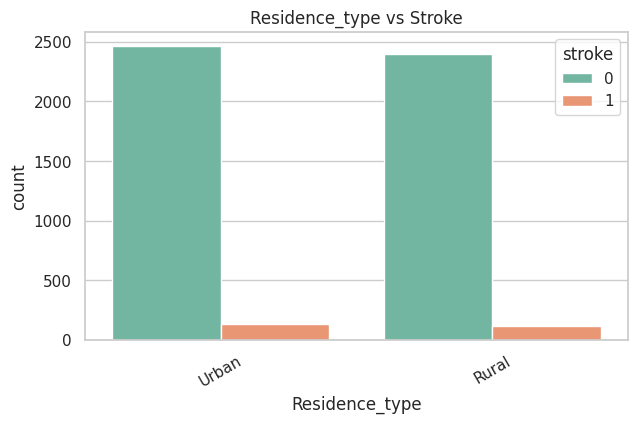

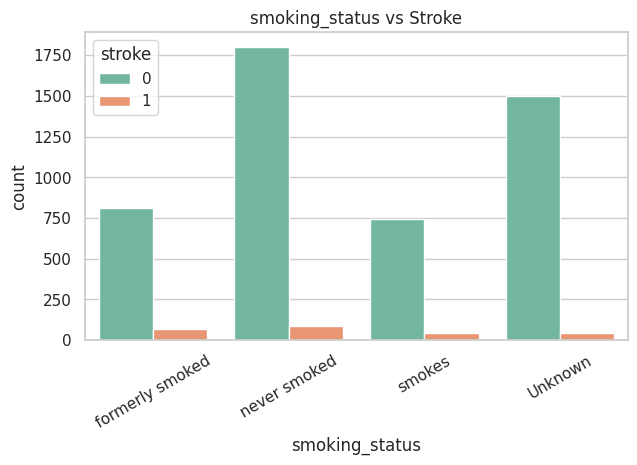

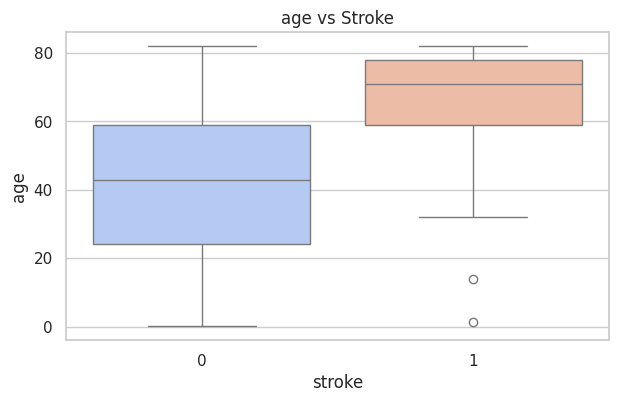

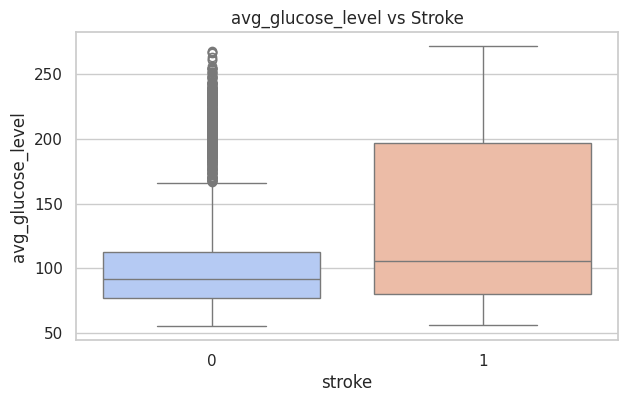

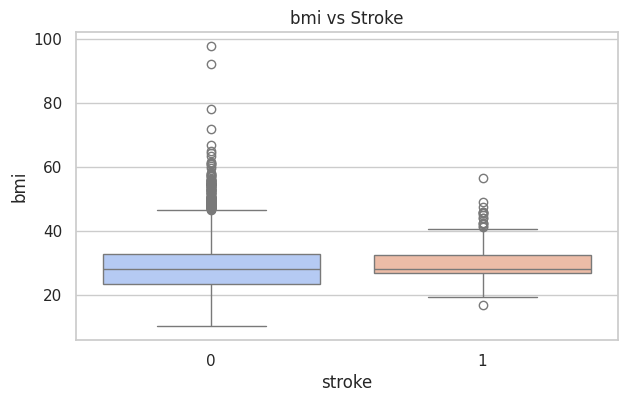

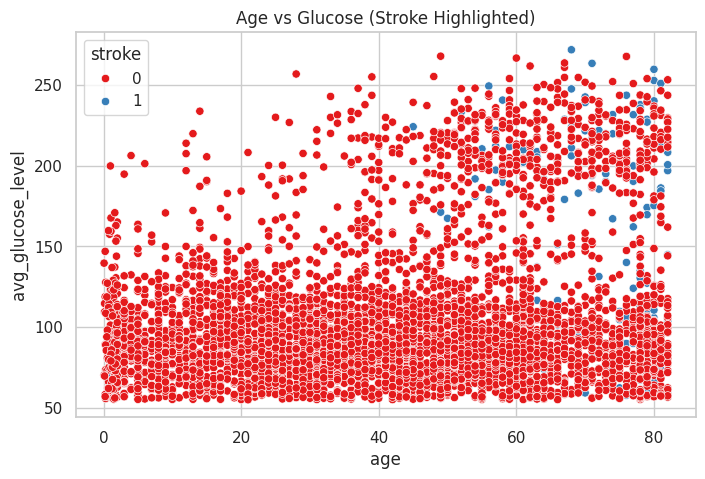

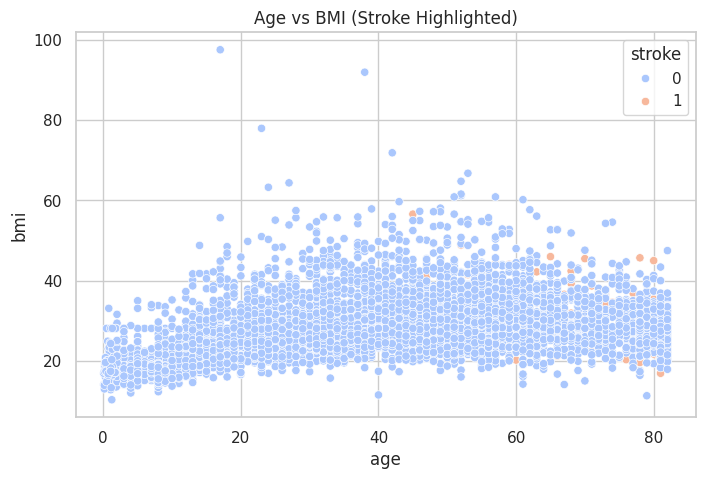

In [13]:
# Multivariate Analysis (Categorical vs Target)
for col in categorical_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(x=col, hue='stroke', data=df, palette='Set2')
    plt.title(f'{col} vs Stroke')
    plt.xticks(rotation=30)
    plt.show()

# Multivariate Analysis (Numeric vs Target)
# Boxplot
for col in numerical_cols:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x='stroke', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} vs Stroke')
    plt.show()

# Scatter: Age vs Glucose
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='avg_glucose_level', hue='stroke', data=df, palette='Set1')
plt.title('Age vs Glucose (Stroke Highlighted)')
plt.show()

# Scatter: Age vs BMI
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='bmi', hue='stroke', data=df, palette='coolwarm')
plt.title('Age vs BMI (Stroke Highlighted)')
plt.show()

- Dari hasil analisis multivariat pada data stroke, terlihat bahwa faktor usia, kadar glukosa, dan status pernikahan memiliki keterkaitan kuat dengan kejadian stroke. Individu yang lebih tua, pernah menikah, memiliki kadar glukosa tinggi, serta riwayat merokok (baik yang masih aktif maupun yang sudah berhenti) cenderung memiliki risiko stroke yang lebih tinggi. Selain itu, scatterplot menunjukkan bahwa kombinasi usia lanjut dengan kadar glukosa atau BMI tinggi memperkuat potensi risiko stroke. Secara keseluruhan, fitur-fitur ini berpotensi menjadi indikator penting untuk model ini

### Correlation Heatmap

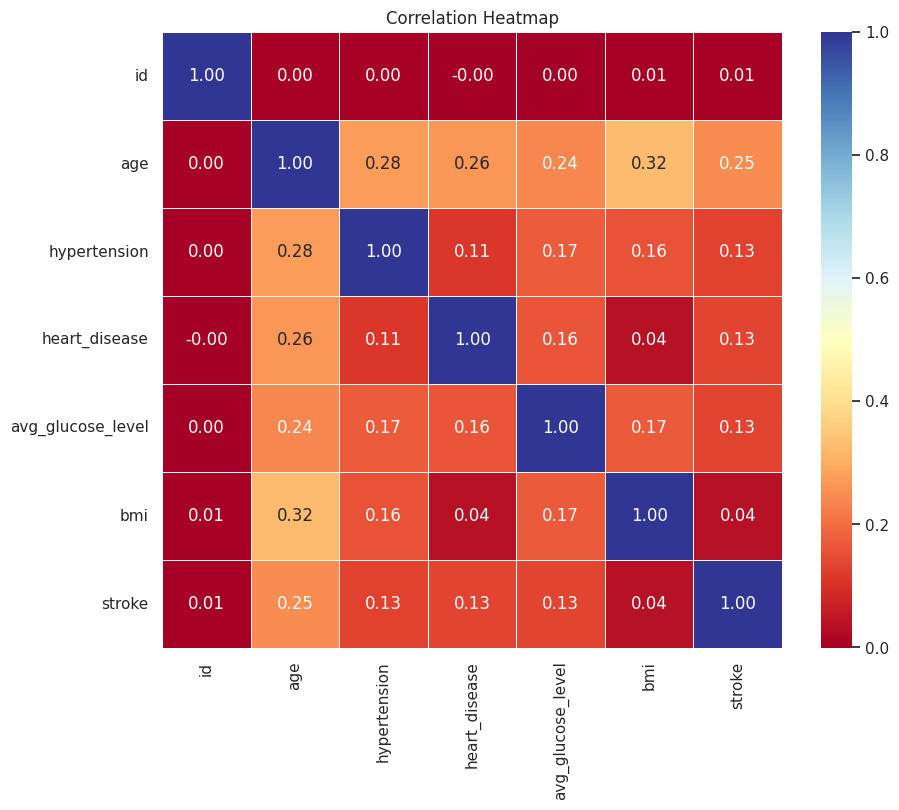

In [14]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

- Usia ('age') menunjukkan korelasi positif tertinggi dengan stroke (0.25) dibandingkan fitur lain, menunjukkan bahwa semakin tua usia seseorang, semakin tinggi kemungkinan untuk mengalami stroke.

### Outlier Detection

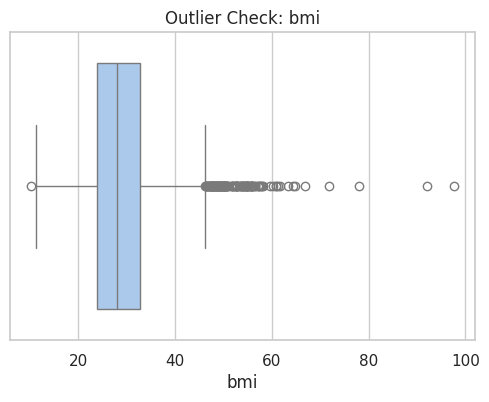

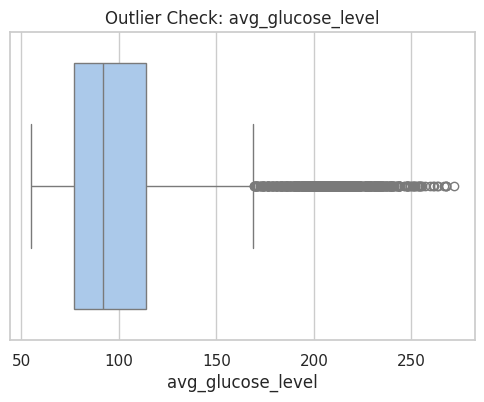

In [15]:
for col in ['bmi', 'avg_glucose_level']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col, palette='pastel')
    plt.title(f'Outlier Check: {col}')
    plt.show()


**Insight**
- Dua kolom yang dipakai buat deteksi outlier pakai boxplot, yaitu bmi dan avg_glucose_level. itu karena mereka adalah numerik kontinu, alias datanya berupa angka real yang bisa punya outlier ekstrim.
- Terdapat banyak outlier pada nilai BMI di sisi atas (nilai yang lebih tinggi), menunjukkan adanya sejumlah individu dengan BMI yang sangat tinggi dalam dataset ini.
- Terdapat banyak outlier pada nilai tingkat glukosa rata-rata ('avg_glucose_level') di sisi atas, menunjukkan bahwa ada sejumlah besar individu dengan kadar glukosa yang sangat tinggi dalam dataset ini.

#Data Preprocessing

### Label Encoding

In [16]:
# Encode fitur kategorikal
label_enc_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
le = LabelEncoder()

for col in label_enc_cols:
    df[col] = le.fit_transform(df[col])

# Cek hasil encoding
print("🔠 Sample Data setelah Encoding:\n")
print(df.head())

🔠 Sample Data setelah Encoding:

      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          2   
1  51676       0  61.0             0              0             1          3   
2  31112       1  80.0             0              1             1          2   
3  60182       0  49.0             0              0             1          2   
4   1665       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             202.21  28.1               2       1  
2               0             105.92  32.5               2       1  
3               1             171.23  34.4               3       1  
4               0             174.12  24.0               2       1  


**Insight**
- Proses encoding pada kode ini dilakukan untuk mengubah fitur kategorikal seperti gender, ever_married, work_type, Residence_type, dan smoking_status menjadi bentuk numerik menggunakan LabelEncoder, agar data bisa diproses oleh algoritma machine learning yang hanya menerima input numerik.

### Feature Scaling

In [17]:
# Fitur numerikal yang mau discaling
scale_cols = ['age', 'avg_glucose_level', 'bmi']

scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# Cek hasil scaling
print("\n📊 Data Setelah Scaling:\n")
print(df[scale_cols].head())


📊 Data Setelah Scaling:

        age  avg_glucose_level       bmi
0  1.051242           2.706450  1.004893
1  0.785889           2.121652 -0.099142
2  1.626174          -0.004867  0.472358
3  0.255182           1.437473  0.719142
4  1.581949           1.501297 -0.631677


**Insight**
- Scaling fitur numerikal kayak age, avg_glucose_level, dan bmi bikin nilai-nilai dari fitur itu jadi punya skala yang sama (mean = 0, std = 1).
- Dari output tersebut, bisa dilihat kalau fitur numerikal age, avg_glucose_level, dan bmi udah berhasil di-scaling dengan metode standardisasi (z-score), sehingga semua nilai berada dalam skala yang seimbang. Nilai positif menunjukkan data di atas rata-rata, dan nilai negatif di bawah rata-rata.

### Split Data

In [18]:
# Pisahin fitur dan label
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split ke train dan test set (pakai 80/20 dulu yaa)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n✅ Split Data:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train distribusi:\n{y_train.value_counts(normalize=True)}")



✅ Split Data:
X_train shape: (4087, 11)
X_test shape : (1022, 11)
y_train distribusi:
stroke
0    0.951309
1    0.048691
Name: proportion, dtype: float64


**Insight**
- Kode diatas melakukan pemisahan data fitur (X) dan label (y), lalu membagi dataset jadi data latih dan data uji dengan proporsi 80:20. Pembagian ini juga pakai stratify berdasarkan label stroke, supaya distribusi kelas tetap seimbang antara data train dan test
- Data Latih: 80% dari total dataset.
- Data Uji: 20% dari total dataset.

Hasil pembagiannya adalah sebagai berikut:
-   **Jumlah total dataset**: 5110 data.
-   **Jumlah data latih**: 4087 data dari 11 fitur.
-   **Jumlah data uji**: 1022 data dari 11 fitur.

# Data Balancing (SMOTE)

In [19]:
!pip install imbalanced-learn

In [20]:
# Import library SMOTE
from imblearn.over_sampling import SMOTE

# Split dulu fitur & target kalo belum
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split ke training dan testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Cek distribusi sebelum SMOTE
print("🎯 Distribusi label sebelum SMOTE:")
print(y_train.value_counts())

# Apply SMOTE buat training data aja
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Cek distribusi sesudah SMOTE
print("\n🔥 Distribusi label setelah SMOTE:")
print(y_train_smote.value_counts())


🎯 Distribusi label sebelum SMOTE:
stroke
0    3888
1     199
Name: count, dtype: int64

🔥 Distribusi label setelah SMOTE:
stroke
0    3888
1    3888
Name: count, dtype: int64


**Insight**
- SMOTE hanya diterapkan ke training data, bukan ke test data
- Kode tersebut digunakan untuk menangani masalah ketidakseimbangan kelas pada variabel target stroke. Pertama, data dipisahkan menjadi fitur (X) dan target (y), kemudian dilakukan pembagian data menjadi set pelatihan dan pengujian dengan metode stratifikasi agar proporsi kelas tetap terjaga. Selanjutnya, teknik SMOTE diterapkan hanya pada data pelatihan untuk menghasilkan sampel sintetis pada kelas minoritas, sehingga distribusi kelas menjadi lebih seimbang.
- Sebelum SMOTE diterapkan, data menunjukkan ketidakseimbangan yang cukup signifikan dengan 3.888 sampel untuk kelas 0 dan hanya 199 sampel untuk kelas 1. Setelah SMOTE, jumlah sampel untuk kelas minoritas (kelas 1) meningkat secara drastis hingga menyamai jumlah kelas mayoritas, yaitu 3.888. Ini berarti SMOTE berhasil menyeimbangkan distribusi kelas sehingga model tidak lagi bias ke kelas mayoritas

# Training Model


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Dictionary buat simpan model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'ANN': MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=42)
}

# Dictionary buat simpan hasil evaluasi
results = {}

# Loop training & evaluasi
for name, model in models.items():
    print(f"\n🚀 Training {name}...")
    model.fit(X_train_smote, y_train_smote)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'Accuracy': acc,
        'ROC AUC': roc_auc,
        'Classification Report': report,
        'Confusion Matrix': cm
    }

    # Cetak metrik penting
    print(f"✅ Accuracy: {acc:.4f}")
    print(f"🎯 ROC AUC: {roc_auc if roc_auc != 'N/A' else 'Tidak tersedia'}")
    print("📄 Classification Report:\n", report)
    print("🧱 Confusion Matrix:\n", cm)



🚀 Training Logistic Regression...
✅ Accuracy: 0.7798
🎯 ROC AUC: 0.7836213991769547
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.87       972
           1       0.14      0.70      0.24        50

    accuracy                           0.78      1022
   macro avg       0.56      0.74      0.55      1022
weighted avg       0.94      0.78      0.84      1022

🧱 Confusion Matrix:
 [[762 210]
 [ 15  35]]

🚀 Training SVM...
✅ Accuracy: 0.7407
🎯 ROC AUC: 0.4539917695473251
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.77      0.85       972
           1       0.04      0.18      0.06        50

    accuracy                           0.74      1022
   macro avg       0.49      0.47      0.46      1022
weighted avg       0.90      0.74      0.81      1022

🧱 Confusion Matrix:
 [[748 224]
 [ 41   9]]

🚀 Training ANN...
✅ Accuracy: 0.1145
🎯 ROC AUC: 0.542

- Kode tersebut digunakan untuk melatih tiga model: Logistic Regression, SVM, dan ANN buat prediksi stroke, terus diuji di data test dengan metrik kayak accuracy, ROC AUC, classification report, dan confusion matrix.

# Evaluasi Model

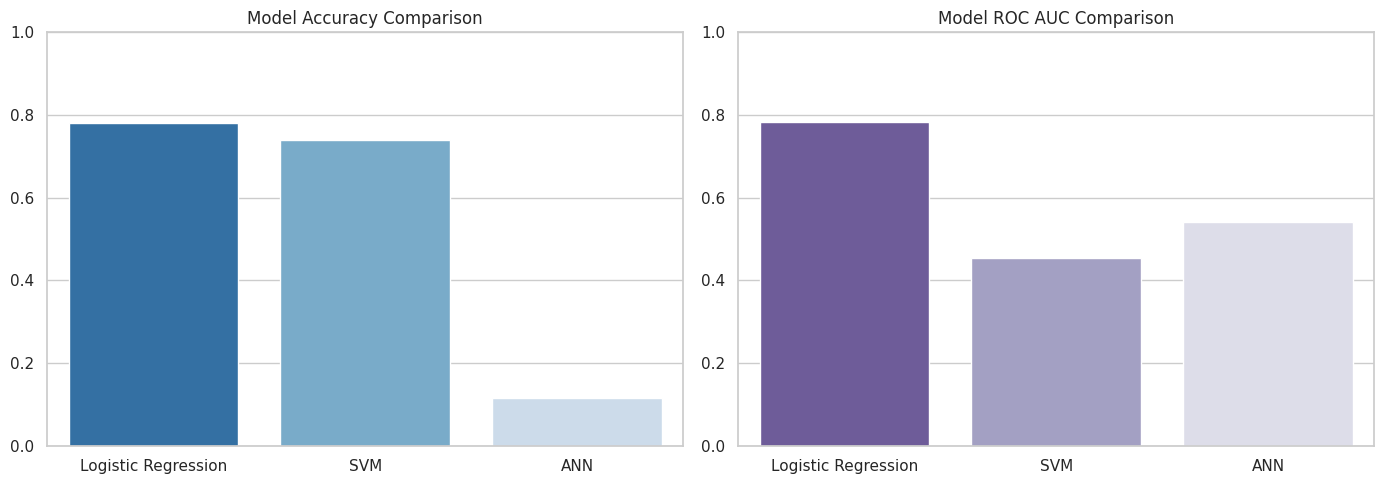

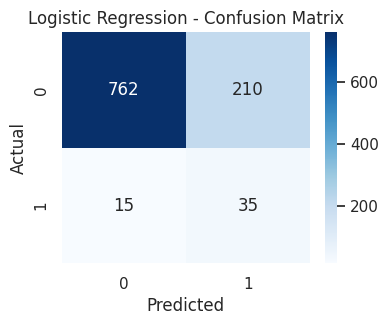

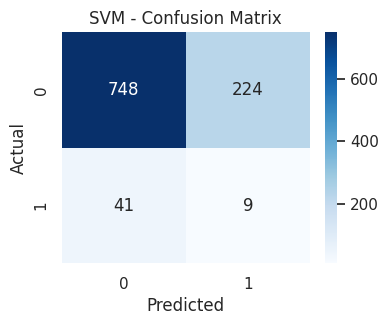

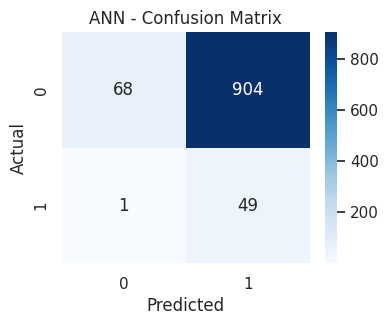

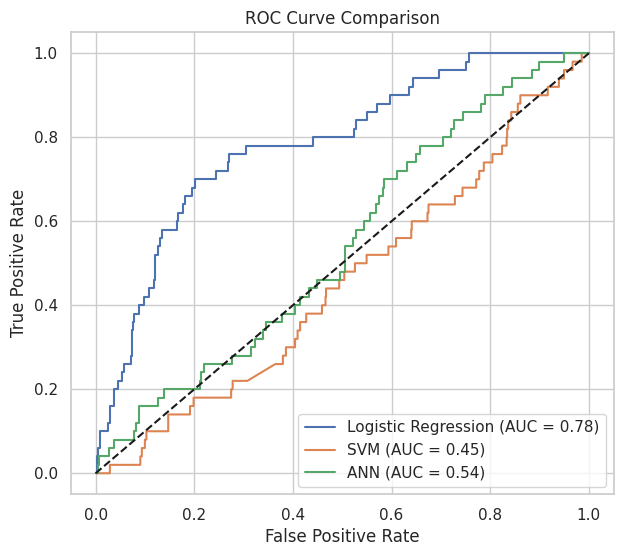

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# ------------------------
# 1. Bar Chart: Accuracy & ROC AUC
# ------------------------

accs = [results[m]['Accuracy'] for m in models]
aucs = [results[m]['ROC AUC'] if results[m]['ROC AUC'] != "N/A" else 0 for m in models]

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
model_names = list(models.keys())

# Accuracy Bar
sns.barplot(x=model_names, y=accs, ax=ax[0], palette="Blues_r")
ax[0].set_title("Model Accuracy Comparison")
ax[0].set_ylim(0, 1)

# ROC AUC Bar
sns.barplot(x=model_names, y=aucs, ax=ax[1], palette="Purples_r")
ax[1].set_title("Model ROC AUC Comparison")
ax[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# ------------------------
# 2. Confusion Matrix Heatmap
# ------------------------

for name in models:
    plt.figure(figsize=(4, 3))
    cm = results[name]['Confusion Matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ------------------------
# 3. ROC Curve
# ------------------------

plt.figure(figsize=(7, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # baseline
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


Kode ini menghasilkan tiga jenis visualisasi yang memberikan gambaran menyeluruh terhadap performa model:
- (1) Bar chart untuk membandingkan akurasi dan nilai ROC AUC antar model, yang menunjukkan seberapa baik model dalam mengklasifikasikan data secara umum dan dalam membedakan kelas positif-negatif;
- (2) Confusion matrix dalam bentuk heatmap untuk setiap model, yang mempermudah identifikasi jumlah prediksi benar dan salah secara visual; serta
- (3) Kurva ROC yang menampilkan trade-off antara true positive rate dan false positive rate, memberikan perspektif lebih lanjut terkait kemampuan deteksi positif dari setiap model. Visualisasi ini membantu mengidentifikasi model yang paling seimbang antara akurasi umum dan sensitivitas terhadap kelas minoritas.

# Feature Importance

🔥 Top Feature Influencers:
              Feature  Coefficient
2                 age     2.392551
4       heart_disease    -1.330620
1              gender    -1.073384
5        ever_married    -0.979342
3        hypertension    -0.948199
7      Residence_type    -0.922256
8   avg_glucose_level     0.395999
6           work_type    -0.350165
10     smoking_status    -0.265809
9                 bmi     0.153400
0                  id     0.000007


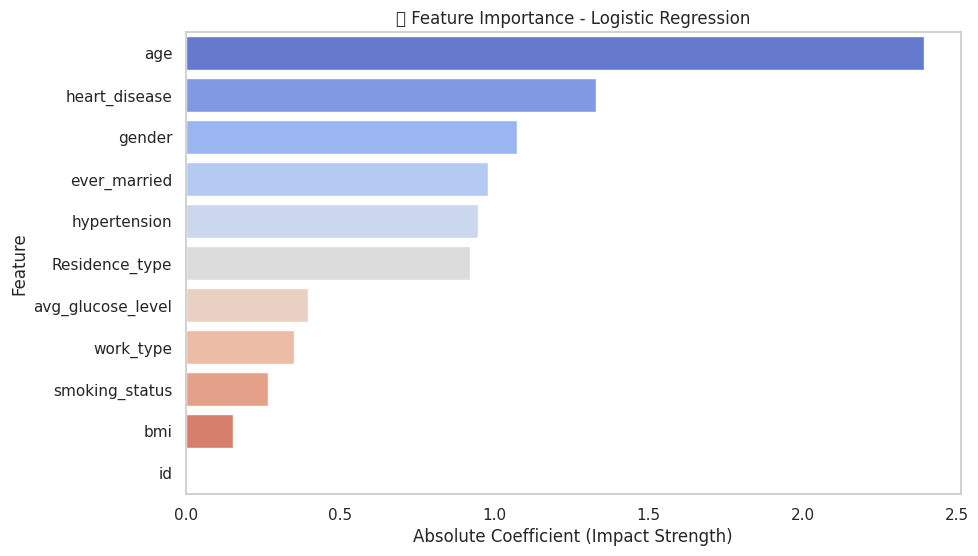

In [23]:
# Ambil model LogReg yang udah dilatih
logreg_model = models['Logistic Regression']

# Ambil fitur dan koefisien
feature_names = X.columns
coefficients = logreg_model.coef_[0]

# Buat dataframe buat visualisasi
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Importance': np.abs(coefficients)
}).sort_values(by='Importance', ascending=False)

# Tampilkan top fitur
print("🔥 Top Feature Influencers:")
print(importance_df[['Feature', 'Coefficient']])

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')
plt.title("🔍 Feature Importance - Logistic Regression")
plt.xlabel("Absolute Coefficient (Impact Strength)")
plt.ylabel("Feature")
plt.grid(axis='x')
plt.show()


- Kode tersebut digunakan untuk mengidentifikasi dan memvisualisasikan fitur-fitur yang paling berpengaruh terhadap prediksi model Logistic Regression. Dengan mengekstrak koefisien dari model yang telah dilatih, kemudian mengurutkannya berdasarkan nilai absolutnya, kode ini menampilkan fitur mana yang memiliki kontribusi paling besar—baik positif maupun negatif—terhadap hasil prediksi.
- Logistic Regression dipilih untuk feature importance karena modelnya interpretable, bisa lihat bobot/koefisien tiap fitur. Setiap fitur punya koefisien yang menunjukkan seberapa besar dan ke arah mana pengaruhnya terhadap probabilitas terjadinya stroke positif berarti meningkatkan risiko, negatif berarti menurunkan.
- Berdasarkan hasil Logistic Regression, fitur yang paling berpengaruh terhadap kemungkinan stroke adalah usia (age) dengan koefisien paling besar positif, menandakan bahwa semakin tua seseorang, semakin tinggi risikonya

# Kesimpulan




| Model                   | Kelas | Accuracy | Precision | Recall | F1-Score |
| ----------------------- | ----- | -------- | --------- | ------ | -------- |
| **Logistic Regression** | 0     | 0.7798   | 0.98      | 0.78   | 0.87     |
|                         | 1     |          | 0.14      | 0.70   | 0.24     |
| **SVM**                 | 0     | 0.7407   | 0.95      | 0.77   | 0.85     |
|                         | 1     |          | 0.04      | 0.18   | 0.06     |
| **ANN**                 | 0     | 0.1145   | 0.99      | 0.07   | 0.13     |
|                         | 1     |          | 0.05      | 0.98   | 0.10     |


- Logistic regreession = Model ini menunjukkan performa yang paling seimbang. Dengan akurasi sebesar 77.98% dan skor ROC AUC sebesar 0.78, model ini mampu mendeteksi kelas minoritas (label 1) dengan recall yang cukup tinggi (0.70).
- Support Vector Machine (SVM) = SVM menghasilkan akurasi sebesar 74.07% namun menunjukkan performa yang buruk dalam mengenali kelas minoritas. Dengan recall hanya 0.18 untuk label 1 dan ROC AUC 0.45, model ini memiliki kecenderungan kuat untuk bias terhadap kelas mayoritas
- Artificial Neural Network = Model ANN menunjukkan performa yang sangat rendah dengan akurasi hanya sebesar 11.45%. Meskipun recall untuk kelas minoritas terlihat tinggi (0.98), hal ini disebabkan oleh model yang cenderung memprediksi sebagian besar data sebagai kelas positif, seperti terlihat dari confusion matrix-nya.